# Preprocess ERA5-Land SM

In [2]:
import xarray as xr 
from pathlib import Path
import rioxarray
import sys
import geopandas as gpd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/home/tommy/neuralhydrology")

from scripts.clip_netcdf_to_shapefile import (
    create_camels_basin_timeseries
)

In [3]:
data_dir = Path("/datadrive/data")
shp_data_dir = data_dir / "CAMELS_GB_DATASET"
path_to_sm_data = data_dir / "gb_soil_moisture_1234_snow.nc"

In [3]:
sm = xr.open_dataset(path_to_sm_data).sortby("time").rename({"latitude": "lat", "longitude": "lon"})
sm

<xarray.Dataset>
Dimensions:  (lat: 87, lon: 93, time: 14244)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2019-12-31
  * lat      (lat) float32 58.56 58.46 58.36 58.26 ... 50.26 50.16 50.06 49.96
  * lon      (lon) float32 -7.57 -7.47 -7.37 -7.27 -7.17 ... 1.33 1.43 1.53 1.63
Data variables:
    swvl1    (time, lat, lon) float32 ...
    swvl2    (time, lat, lon) float32 ...
    swvl3    (time, lat, lon) float32 ...
    swvl4    (time, lat, lon) float32 ...
    sd       (time, lat, lon) float32 ...

In [4]:
plot = sm[["swvl1"]].dropna(dim="lon", how="all").dropna(dim="lat", how="all")

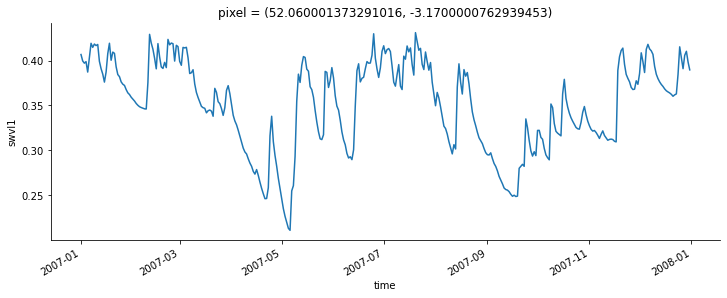

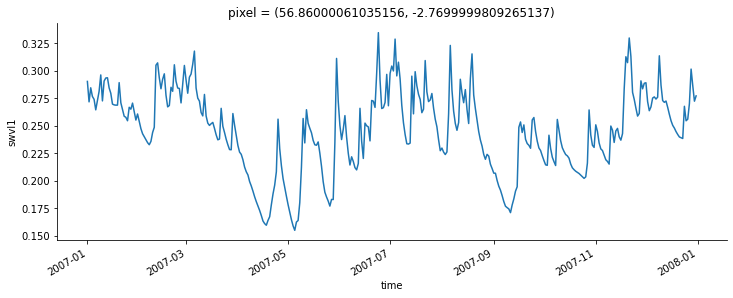

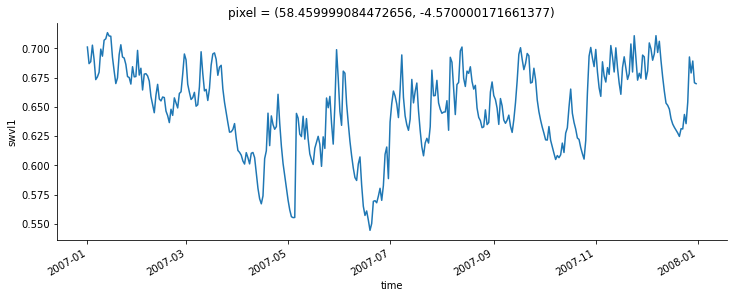

In [5]:
pixels = plot.stack(pixel=["lat", "lon"]).dropna("pixel", how="all")
choices = np.random.choice(pixels.pixel.values, 3)

for px in choices:
    f, ax = plt.subplots(figsize=(12, 4))
    pixels.sel(pixel=px)["swvl1"].sel(time="2007").plot(ax=ax)
    sns.despine()

# chop out basins

In [7]:
outfilepath = (data_dir / "camels_basin_ERA5Land_sm.nc")
if not outfilepath.exists():
    era5_sm = create_camels_basin_timeseries(path_to_sm_data=path_to_sm_data, shp_data_dir=shp_data_dir, lat_dim="latitude", lon_dim="longitude")
    
    era5_sm["station_id"] = era5_sm.station_id.astype("int64")
    era5_sm = era5_sm.sortby("time")
    
    # save the catchment averaged timeseries of soil moisture
    era5_sm.to_netcdf(outfilepath)
else:
    era5_sm = xr.open_dataset(outfilepath)
    

era5_sm

Rasterising Geometry: : 43it [00:00, 201.15it/s, 17018]

No data for basin 107001


Rasterising Geometry: : 671it [00:03, 202.61it/s, 97002]
Chopping ROI: 100%|██████████| 670/670 [59:30<00:00,  5.33s/it, 97002] 


NameError: name 'esa_ds' is not defined

In [8]:
era5_sm

<xarray.Dataset>
Dimensions:      (station_id: 670, time: 14244)
Coordinates:
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2019-12-31
    spatial_ref  int64 0
  * station_id   (station_id) int64 10002 10003 1001 ... 96002 96004 97002
Data variables:
    swvl1        (station_id, time) float32 0.322 0.3481 ... 0.6071 0.5969
    swvl2        (station_id, time) float32 0.3248 0.3301 ... 0.6074 0.6046
    swvl3        (station_id, time) float32 0.3454 0.344 ... 0.6101 0.6096
    swvl4        (station_id, time) float32 0.3498 0.3498 ... 0.6158 0.6157
    sd           (station_id, time) float32 0.0001459 0.0005186 ... 0.0 0.0

# Save to netcdf

In [5]:
filepath = data_dir / "camels_basin_ERA5Land_sm.nc"
xr.open_dataset(filepath)

<xarray.Dataset>
Dimensions:      (station_id: 670, time: 14244)
Coordinates:
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2019-12-31
    spatial_ref  int64 ...
  * station_id   (station_id) int64 10002 10003 1001 ... 96002 96004 97002
Data variables:
    swvl1        (station_id, time) float32 ...
    swvl2        (station_id, time) float32 ...
    swvl3        (station_id, time) float32 ...
    swvl4        (station_id, time) float32 ...
    sd           (station_id, time) float32 ...